<a href="https://colab.research.google.com/github/MPetrinovic/Personal-Projects/blob/main/Rje%C5%A1enje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')
from scipy.stats import chi2_contingency

In [10]:
data = pd.read_csv('schools_data.csv')
data.shape

(7900, 32)

In [6]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,repeated,data_perimeter
0,MS,F,15,Urban,>3,Married,2,3,other,other,other,father,2,1,0,False,True,False,True,True,True,False,False,3,5,1,1,1,5,0,0,validation
1,MS,M,15,Urban,<=3,Married,4,3,teacher,services,home,mother,1,3,0,False,True,False,True,True,True,True,False,5,4,3,1,1,4,2,0,train
2,MS,M,16,Rural,>3,Divorced,4,4,other,teacher,reputation,mother,2,3,0,False,True,False,True,True,True,True,True,2,4,3,1,1,5,7,0,validation
3,MS,F,15,Rural,>3,Married,3,4,services,health,course,mother,1,3,0,True,True,True,True,True,True,True,False,4,3,2,1,1,5,2,0,train
4,MS,F,15,Rural,>3,Married,2,2,at_home,other,reputation,mother,1,1,0,True,True,True,True,True,True,False,False,4,3,1,1,1,2,8,0,validation


In [ ]:
work_data = data.copy()
work_data.sample(5)

0    0.697215
1    0.302785
Name: repeated, dtype: float64

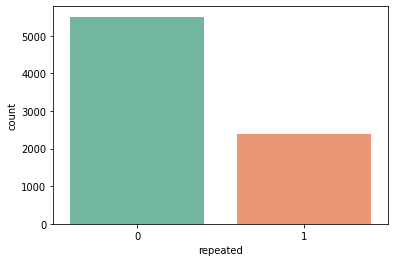

In [35]:
sns.countplot(x = 'repeated', data = data)
work_data['repeated'].value_counts()/7900

1. varijabla = SCHOOL

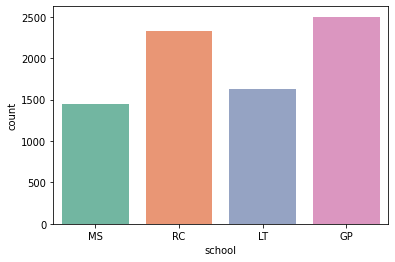

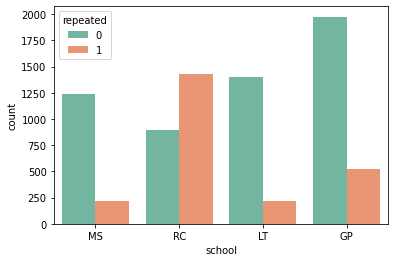

In [36]:
sns.countplot(x = 'school', data = data)
plt.show()
data['school'].value_counts()
sns.countplot(x = 'school', hue = 'repeated',data = data)
plt.show()

In [31]:
obs = pd.crosstab(data['school'],data['repeated'])
print(obs)
g, p, dof, expctd = chi2_contingency(obs,lambda_="log-likelihood")
print(p)

repeated     0     1
school              
GP        1975   527
LT        1403   222
MS        1234   214
RC         896  1429
0.0


$\chi^2$ test pokazuje ovisno varijable škola i ponavljanja godine. Možemo reći da ponavljanje godine ovisi o školi koju učenik pohađa. 

2.Varijabla = sex

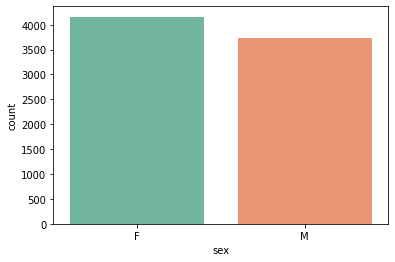

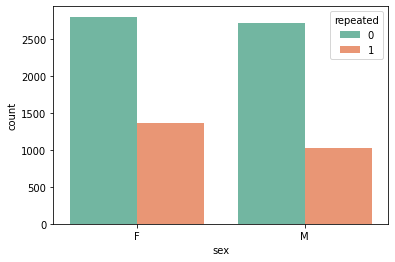

In [37]:
sns.countplot(x = 'sex', data = data)
plt.show()
data['sex'].value_counts()
sns.countplot(x = 'sex', hue = 'repeated',data = data)
plt.show()

In [53]:
obs = pd.crosstab(data['sex'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print(p)

repeated     1     0
sex                 
F         1361  2799
M         1031  2709
7.207292390507581e-07


In [54]:
a = 1361/2799
b = 1031/2709
oddrat = a/b
print(oddrat)

1.2776313696626445


In [50]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

OddsR:  1.2776313696626445 p-Value: 7.212931680765025e-07


3.varijabla = age

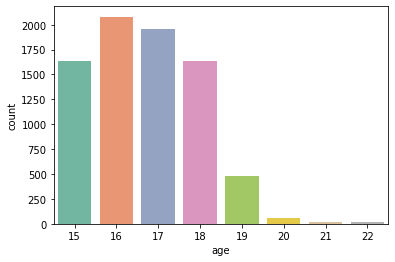

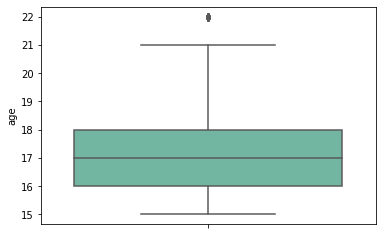

In [57]:
sns.countplot(x='age',data=data)
plt.show()
sns.boxplot(y='age',data=data)
plt.show()

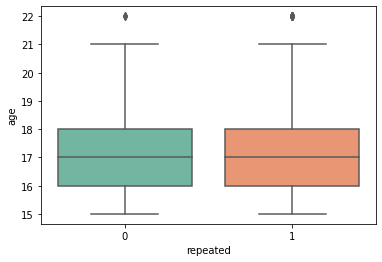

In [58]:
sns.boxplot(y='age',x = 'repeated',data=data)
plt.show()

In [67]:
r0 = data.age[data.repeated == 0]
r1 = data.age[data.repeated == 1]
s, p = stats.ttest_ind(r0,r1,equal_var = False)
print(p)

1.0255377075099464e-22


In [68]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'repeated', 'data_perimeter'],
      dtype='object')

4.varijabla = address

Urban    0.777215
Rural    0.222785
Name: address, dtype: float64


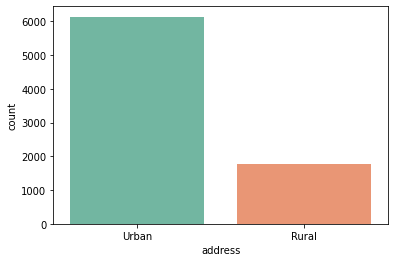

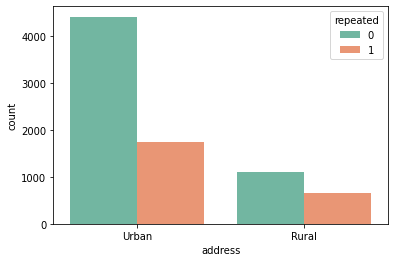

In [73]:
print(data['address'].value_counts()/7900)
sns.countplot(x = 'address', data = data)
plt.show()
sns.countplot(x = 'address', hue = 'repeated',data = data)
plt.show()

In [79]:
obs = pd.crosstab(data['address'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

repeated     1     0
address             
Rural      655  1105
Urban     1737  4403
chi2 test p-value:  1.6413675145703275e-12
OddsR:  1.5025463885567512 p-Value: 1.491683833664934e-12


5.varijabla = famsize

>3     0.711392
<=3    0.288608
Name: famsize, dtype: float64


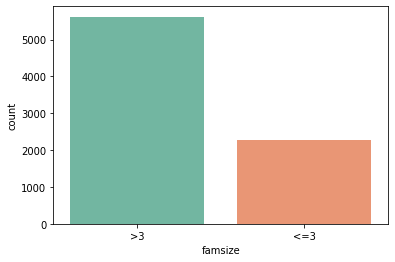

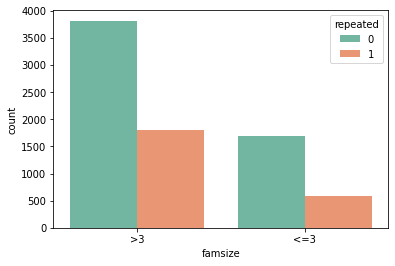

In [80]:
print(data['famsize'].value_counts()/7900)
sns.countplot(x = 'famsize', data = data)
plt.show()
sns.countplot(x = 'famsize', hue = 'repeated',data = data)
plt.show()

In [81]:
obs = pd.crosstab(data['famsize'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

repeated     1     0
famsize             
<=3        589  1691
>3        1803  3817
chi2 test p-value:  3.7887932365568124e-08
OddsR:  0.7373914885926701 p-Value: 3.47321369191552e-08


In [84]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'repeated', 'data_perimeter'],
      dtype='object')

6.varijabla = Pstatus

Married     0.896203
Divorced    0.103797
Name: Pstatus, dtype: float64


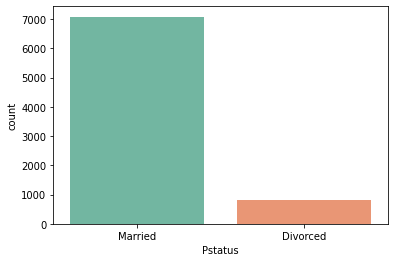

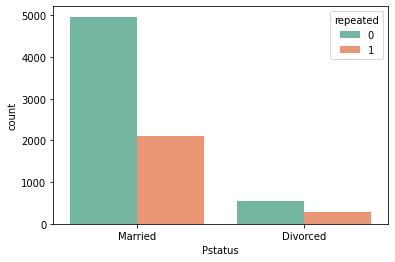

In [85]:
print(data['Pstatus'].value_counts()/7900)
sns.countplot(x = 'Pstatus', data = data)
plt.show()
sns.countplot(x = 'Pstatus', hue = 'repeated',data = data)
plt.show()

In [86]:
obs = pd.crosstab(data['Pstatus'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

repeated     1     0
Pstatus             
Divorced   278   542
Married   2114  4966
chi2 test p-value:  0.02011004261727061
OddsR:  1.2048895607215295 p-Value: 0.017869565928866786


7.Varijabla = Medu

4    0.331646
2    0.260759
3    0.250633
1    0.149367
0    0.007595
Name: Medu, dtype: float64


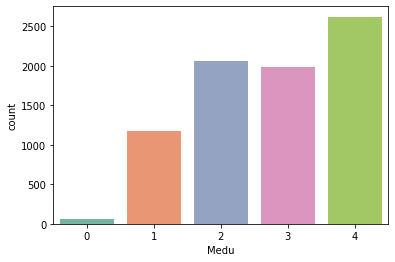

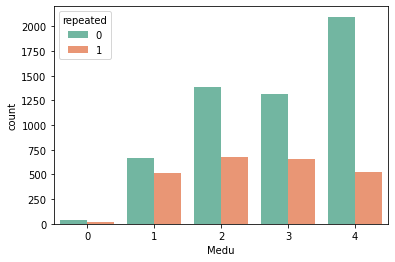

In [87]:
print(data['Medu'].value_counts()/7900)
sns.countplot(x = 'Medu', data = data)
plt.show()
sns.countplot(x = 'Medu', hue = 'repeated',data = data)
plt.show()

In [91]:
obs = pd.crosstab(data['Medu'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

repeated    1     0
Medu               
0          19    41
1         515   665
2         676  1384
3         660  1320
4         522  2098
chi2 test p-value:  1.9154892352225763e-53


8.Varijabla = Fedu

2    0.291139
3    0.253165
4    0.243038
1    0.207595
0    0.005063
Name: Fedu, dtype: float64


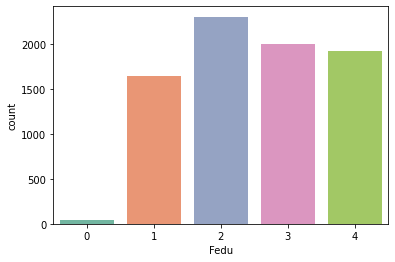

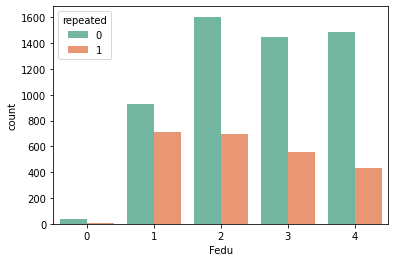

repeated    1     0
Fedu               
0           6    34
1         709   931
2         694  1606
3         553  1447
4         430  1490
chi2 test p-value:  7.80967622721655e-41


In [92]:
print(data['Fedu'].value_counts()/7900)
sns.countplot(x = 'Fedu', data = data)
plt.show()
sns.countplot(x = 'Fedu', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['Fedu'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

In [97]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'repeated', 'data_perimeter'],
      dtype='object')

9.Varijabla = Mjob

other       0.356962
services    0.260759
at_home     0.149367
teacher     0.146835
health      0.086076
Name: Mjob, dtype: float64


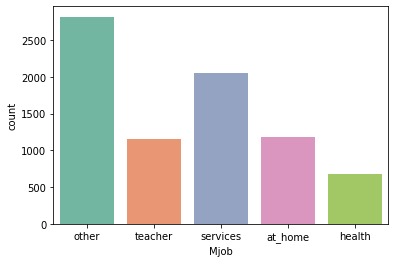

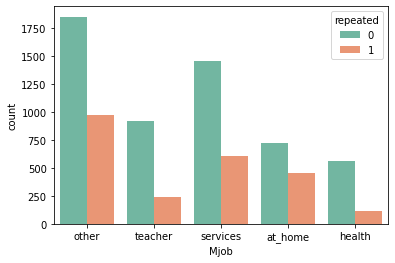

repeated    1     0
Mjob               
at_home   458   722
health    116   564
other     972  1848
services  602  1458
teacher   244   916
chi2 test p-value:  5.534005768615867e-37


In [98]:
print(data['Mjob'].value_counts()/7900)
sns.countplot(x = 'Mjob', data = data)
plt.show()
sns.countplot(x = 'Mjob', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['Mjob'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

10.Varijabla = Fjob

other       0.549367
services    0.281013
teacher     0.073418
at_home     0.050633
health      0.045570
Name: Fjob, dtype: float64


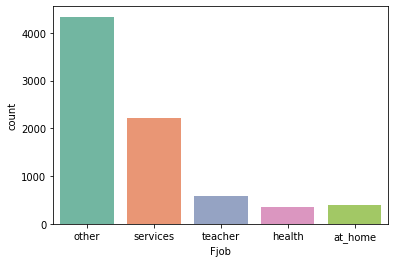

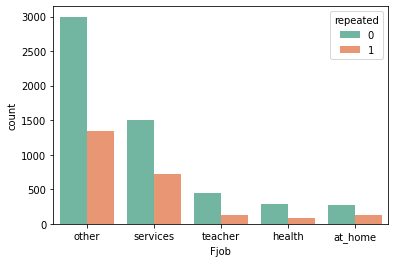

repeated     1     0
Fjob                
at_home    125   275
health      79   281
other     1344  2996
services   715  1505
teacher    129   451
chi2 test p-value:  2.360506464975341e-07


In [99]:
print(data['Fjob'].value_counts()/7900)
sns.countplot(x = 'Fjob', data = data)
plt.show()
sns.countplot(x = 'Fjob', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['Fjob'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

In [100]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'repeated', 'data_perimeter'],
      dtype='object')

11.Varijabla = reason

course        0.367089
home          0.275949
reputation    0.265823
other         0.091139
Name: reason, dtype: float64


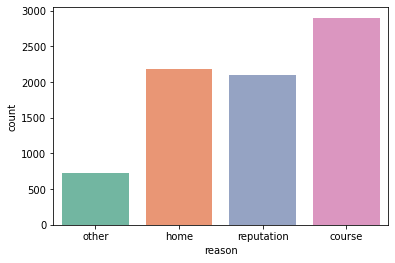

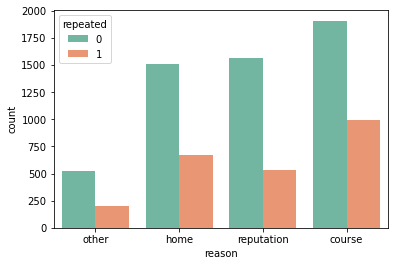

repeated      1     0
reason               
course      990  1910
home        667  1513
other       200   520
reputation  535  1565
chi2 test p-value:  5.704380116706152e-10


In [103]:
print(data['reason'].value_counts()/7900)
sns.countplot(x = 'reason', data = data)
plt.show()
sns.countplot(x = 'reason', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['reason'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

12.Varijaba = guardian

mother    0.691139
father    0.227848
other     0.081013
Name: guardian, dtype: float64


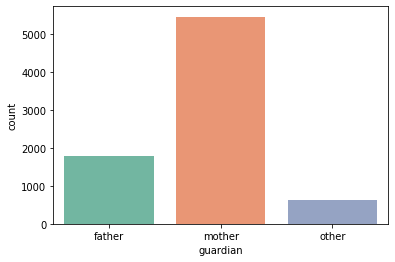

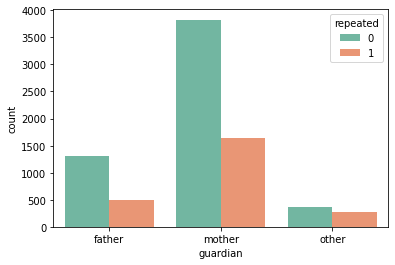

repeated     1     0
guardian            
father     486  1314
mother    1634  3826
other      272   368
chi2 test p-value:  4.410004950005862e-12


In [104]:
print(data['guardian'].value_counts()/7900)
sns.countplot(x = 'guardian', data = data)
plt.show()
sns.countplot(x = 'guardian', hue = 'repeated',data = data)
plt.show()

obs = pd.crosstab(data['guardian'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)

In [105]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'repeated', 'data_perimeter'],
      dtype='object')